In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from datetime import datetime
from scipy.signal import savgol_filter
import seaborn as sns
from tsmoothie.smoother import *
from matplotlib.widgets import CheckButtons, Slider, Button
import matplotlib.dates as dates 
dates.DateFormatter('%Y-%m-%d %H:%M:%S')

In [2]:
#Create dataframe 
df = pd.read_csv('dist.csv')
df = df.apply(lambda x : pd.Series(x.dropna().values))
df = df.dropna()


In [3]:


def setUltrawide():
    from IPython.core.display import display, HTML
    display(HTML("<style>.container { width:100% !important; }</style>"))
setUltrawide()


C:\Users\gulza\AppData\Local\Temp\ipykernel_10032\2238945257.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [4]:
# plotting functions
def plot(data,name,alpha):
 
    l1, = ax.plot(t,data,label = name, alpha = alpha)
    return l1

#returns list of gaussian smoothing
def gaussianSmooth(data):
    smoother = GaussianSmoother(n_knots = 20, sigma = 0.07)
    smoother.smooth(data)
    return smoother.smooth_data[0]

#returns list of rate of change
def rate_of_change(data,window):
    count = 1
    grad = []
    for x in data:
        if(count+window<len(data)):
            dy = data[count+window] - x
            dx = t[count+window] - t[count]
        count +=1
        grad.append(dy)
    return grad


In [5]:
#for lowess function cause it takes ages
#smoother = LowessSmoother(smooth_fraction=0.05)
#smoother.smooth(circumference)


In [6]:
def func(label):
    index = labels.index(label)
    lines[index].set_visible(not lines[index].get_visible())
    ax.draw()

TypeError: list indices must be integers or slices, not str

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
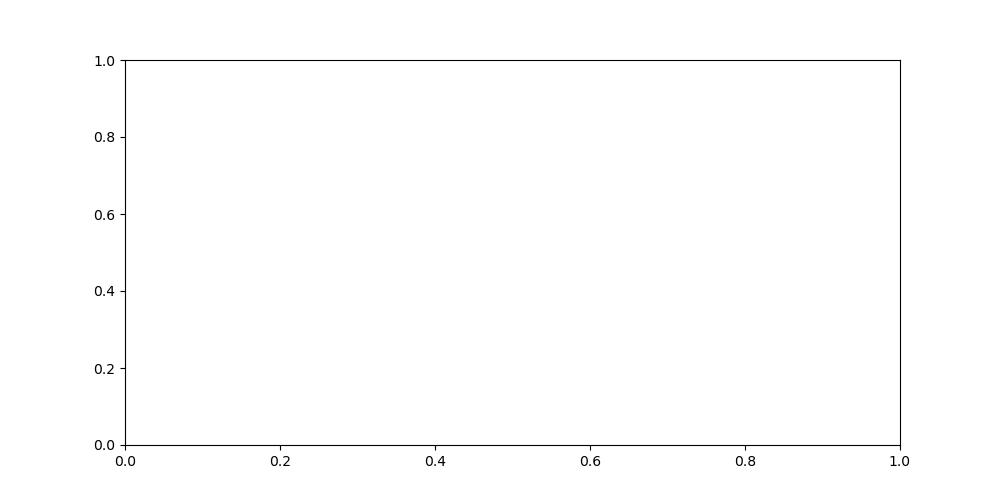

In [13]:
# Create axis
%matplotlib widget

fig, ax = plt.subplots(figsize = (10,5))

t = []
fraction = 0.15
for x in range(len(df['sample_date'])):
    t.append(pd.to_datetime((df['sample_date'][x].split('/')[2]+df['sample_date'][x].split('/')[1]+df['sample_date'][x].split('/')[0]+' '+df['sample_time'][x])))
#df.style.format({"DOB": lambda t: t.strftime("%Y-%m-%d")}) 
df['datetime'] = t
#df['DateStrings'] = df['datetime'].dt.strftime('%Y-%m-%d %H:%M:%S')
#t = df['DateStrings']
lines = []
#lowessArray = pd.read_csv('lowess')
#smoothing was pre done but takes a girllion seconds to load
#lowess = np.array(lowessArray['0'])

lowessArray = LowessSmoother(smooth_fraction = 0.05)
lowessArray.smooth(df['dist'])
lowess = lowessArray.smooth_data[0]

circumference = df['dist']
#subtract mean
lines.append(plot(circumference ,'Circumference',0.3))


#subtract mean
lowessSmooth = plot(lowess,'Lowess Smooth',1)
lines.append(lowessSmooth)
lines.append(plot(df['sensor_2']/10,'Sen2',1))
lines.append(plot(np.gradient(lowess)*300,'Lowess gradient',1))
plt.legend()
ax.plot(t,np.zeros(len(df.index)), color = 'black')
rax = plt.axes([0.05, 0.4, 0.1, 0.15])
labels = [str(line.get_label()) for line in lines]
visibility = [line.get_visible() for line in lines]
check = CheckButtons(rax, labels, visibility)
check.on_clicked(func)


In [12]:
indexes = []
diffThreshold = 50
maxValue = 950
noiseLevel = 550
sen2 = df[(abs(df['sensor_1']-df['sensor_3'])<diffThreshold) & (df['sensor_2']>maxValue) & (df['sensor_1']>530)]

sen3 = df[(abs(df['sensor_2']-df['sensor_4'])<diffThreshold) & (df['sensor_3']>maxValue)&(df['sensor_2']> noiseLevel) &(df['sensor_4']>noiseLevel)] 
sen4 = df[(abs(df['sensor_3']-df['sensor_5'])<diffThreshold) & (df['sensor_4']>maxValue)&(df['sensor_3']>noiseLevel)&(df['sensor_5']>noiseLevel)]
sen5 = df[(abs(df['sensor_4']-df['sensor_6'])<diffThreshold) & (df['sensor_5']>maxValue)& (df['sensor_4']>noiseLevel)&(df['sensor_6']>noiseLevel)]
sen6 = df[(abs(df['sensor_5']-df['sensor_7'])<diffThreshold) & (df['sensor_6']>maxValue)& (df['sensor_5']>noiseLevel)&(df['sensor_7']>noiseLevel)]
sen7 = df[(abs(df['sensor_6']-df['sensor_8'])<diffThreshold) & (df['sensor_7']>maxValue)&(df['sensor_6']>noiseLevel)&(df['sensor_8']>noiseLevel)]
for x in sen2.index: indexes.append(x)
for x in sen3.index: indexes.append(x)
for x in sen4.index: indexes.append(x)
for x in sen5.index: indexes.append(x)
for x in sen6.index: indexes.append(x)
for x in sen7.index: indexes.append(x)
indexes.sort()
print(len(indexes))
data = df.iloc[indexes]
ax.plot(data.index,data['dist'],label = 'correct')
fig1,ax1 = plt.subplots()
ax1.scatter(data['datetime'],data['dist'])
ax1.plot(t,lowess)


#incorrect Values
indexes = []
sen2 = df[(abs(df['sensor_1']-df['sensor_3'])<diffThreshold) & (df['sensor_2']<maxValue) & (df['sensor_1']>noiseLevel)]

sen3 = df[(abs(df['sensor_2']-df['sensor_4'])<diffThreshold) & (df['sensor_3']<maxValue)&(df['sensor_2']> noiseLevel) ] 
sen4 = df[(abs(df['sensor_3']-df['sensor_5'])<diffThreshold) & (df['sensor_4']<maxValue)&(df['sensor_3']>noiseLevel)]
sen5 = df[(abs(df['sensor_4']-df['sensor_6'])<diffThreshold) & (df['sensor_5']<maxValue)& (df['sensor_4']>noiseLevel)]
sen6 = df[(abs(df['sensor_5']-df['sensor_7'])<diffThreshold) & (df['sensor_6']<maxValue)& (df['sensor_5']>noiseLevel)]
sen7 = df[(abs(df['sensor_6']-df['sensor_8'])<diffThreshold) & (df['sensor_7']<maxValue)&(df['sensor_6']>noiseLevel)]
for x in sen2.index: indexes.append(x)
for x in sen3.index: indexes.append(x)
for x in sen4.index: indexes.append(x)
for x in sen5.index: indexes.append(x)
for x in sen6.index: indexes.append(x)
for x in sen7.index: indexes.append(x)
indexes.sort()
print(len(indexes))
data = df.iloc[indexes]
ax.plot(data.index,data['dist'],label = 'correct')
#ax1.scatter(data['datetime'],data['dist'],color = 'red', alpha = 0.3)



#when bracelet is off
indexes = []
offValues = df[(df['sensor_1']> 600) & (df['sensor_2'] == 1020) & (df['sensor_3']<600)]
for x in offValues.index: indexes.append(x)
indexes.sort()
data = df.iloc[indexes]
ax1.scatter(data['datetime'],data['dist'],color = 'red')

TypeError: list indices must be integers or slices, not str

In [9]:
data.head()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sample_date,sample_time,dist,datetime
0,683,1020,545,502,503,506,507,506,03/12/2021,16:07:13,0.0425,2021-12-03 16:07:13
1,683,1020,545,502,503,506,507,506,03/12/2021,16:07:14,0.0425,2021-12-03 16:07:14
2,683,1020,545,502,503,506,507,506,03/12/2021,16:07:16,0.0425,2021-12-03 16:07:16
3,683,1020,545,502,503,506,507,506,03/12/2021,16:07:17,0.0425,2021-12-03 16:07:17
4,683,1020,545,502,503,506,507,506,03/12/2021,16:07:19,0.0425,2021-12-03 16:07:19


4587
0
25.709001233045623
0.0


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
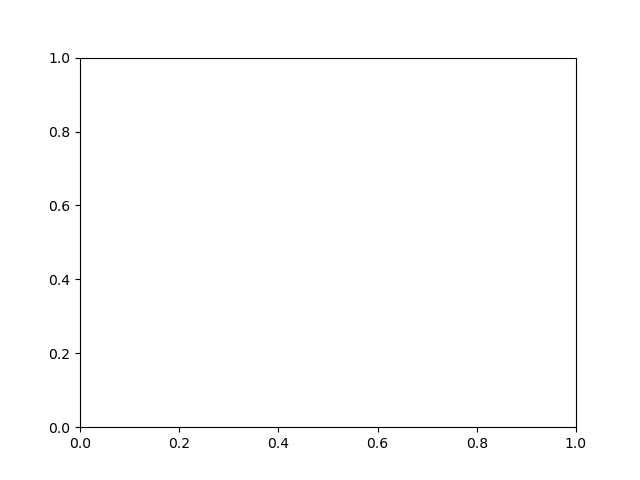

In [10]:
df = []
def identifyValues(df):
    diffThreshold = 50
    maxValue = 900
    noiseValues = 530
    sen2 = df[(abs(df['sensor_1']-df['sensor_3'])<diffThreshold) & (df['sensor_2']<maxValue) & (df['sensor_1']>noiseLevel)]

    sen3 = df[(abs(df['sensor_2']-df['sensor_4'])<diffThreshold) & (df['sensor_3']<maxValue)&(df['sensor_2']> noiseLevel) ] 
    
    sen4 = df[(abs(df['sensor_3']-df['sensor_5'])<diffThreshold) & (df['sensor_4']<maxValue)&(df['sensor_3']>noiseLevel)]
    sen5 = df[(abs(df['sensor_4']-df['sensor_6'])<diffThreshold) & (df['sensor_5']<maxValue)& (df['sensor_4']>noiseLevel)]
    sen6 = df[(abs(df['sensor_5']-df['sensor_7'])<diffThreshold) & (df['sensor_6']<maxValue)& (df['sensor_5']>noiseLevel)]
    sen7 = df[(abs(df['sensor_6']-df['sensor_8'])<diffThreshold) & (df['sensor_7']<maxValue)&(df['sensor_6']>noiseLevel)]
    #collection of sensorvalues that should be incorrect. 
    index = []
    for x in sen2.index: index.append(x)
    for x in sen3.index: index.append(x)
    for x in sen4.index: index.append(x)
    for x in sen5.index: index.append(x)
    for x in sen6.index: index.append(x)
    for x in sen7.index: index.append(x)
    index.sort()
    
    #values where bracelet removed
    remIndex = []
    #sould be continious
    removedValues = df[(df['sensor_1']> 600) & (df['sensor_2'] == 1020) & (df['sensor_3']<600)] #used after the roc to verify its at minimum dist
    #calculate roc for all sensors, add together
    for x in removedValues.index: remIndex.append(x)
    remIndex.sort()
    indexes = [index,remIndex]
    return indexes
#ncoull values, 

#test_dataset = pd.read_csv('ali_test\\test_dataset_8.csv')
test_dataset = pd.read_csv('ali_test\\test_data_file_10.csv')
t = []



fig2,ax2 = plt.subplots()
test_dataset.head()
index = identifyValues(test_dataset)
print(len(index[0]))
print(len(index[1]))
percentage = (len(index[0]) * 100) /len(test_dataset.index)
percentage
test_dataset.head()
print(percentage)
percentage = (len(index[1])*100)/ len(test_dataset.index)
print(percentage)

In [ ]:
def findRemoved():
    #values where braclet is removed
    